<h1>Rede neural para classificar imagens de números </h1>

In [2]:
import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("First 5 training labels: ", y_train[:5])

First 5 training labels:  [5 0 4 1 9]


<h1> tratamento dos dados </h1>
<p> Antes de tudo, vamos colocar cada imagem com sua respectiva categoria de um jeito que a categoria seja representada por uma posição no array. Por exemplo, se a imagem foi classificada como o número 5, então a categoria é um array marcando 1 na posição 5.

Isso serve para saber o quão longe está da predição correta. Se o número 8 foi visto como número 0, é um erro maior do que o número 8 ser confundido com o 7
</p>

In [3]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)







In [4]:
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [5]:
print(y_train.shape) 

(60000, 10)


In [6]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [7]:
from keras.layers import Dense # camadas completamente conectadas
from keras.models import Sequential # https://keras.io/models/sequential/

<h1> Modelo Sequencial </h1>
<p>Existem duas formas de criar modelos no Keras: Sequencial e funcional.</p>
<p>No caso, foi optado pelo modelo sequencial, que permite a criação de modelos camada por camada para a maioria dos problemas. O modelo funcional, por sua vez, permitiria camadas de serem conectadas com outras camadas não adjacentes, usados para modelos mais complexos.

<h1> Função de ativação </h1>
<p>Funções de ativação são usadas para determinar o <i>output</i> de redes neurais, no caso um vetor de 10 valores, em que 9 serão "0" e um será "1". Ela mapeia o resultado da predição do valor nesse vetor.</p>
<p>A função optada para as camadas intermediárias foi a Sigmoid (ou Logística), em que a curva gráfica lembra o formato da letra "S". Essa função é muito utilizada no campo de redes neurais pela sua continuidade e diferencialç</p>
<p>Como as saídas são no formato citado anteriormente (<i>one-hot vector</i>), usamos a função de ativação softmax na última camada, a qual é indicada nesse tipo de saída, assim como em muitas redes neurais baseadas em classificação.</p>

In [8]:

image_size = 28*28
model = Sequential()

model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


<p>No modelo acima, temos uma camada oculta com 32 neurônios.

   A camada de saída possui 10 neurônios
</p>

In [9]:
import matplotlib.pyplot as plt

model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)



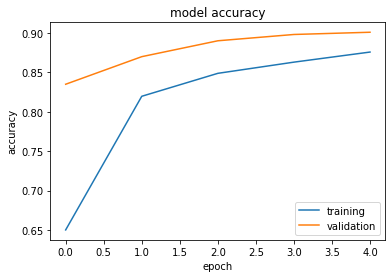

Test loss: 0.489
Test accuracy: 0.885


In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')